In [7]:
import numpy as np
import pandas as pd

# Візуалізація
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Машинне навчання
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Оцінка моделей
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    f1_score
)

# Балансування класів
from imblearn.over_sampling import SMOTE


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Завантажуємо дані

In [8]:
data_path = 'drive/MyDrive/Data_analitic/Projects/diabetes_dataset.csv'
diabetes_dataset = pd.read_csv(data_path)

Опис змінних у наборі даних

| Назва колонки             | Опис                                                                 |
|---------------------------|----------------------------------------------------------------------|
| `year`                    | Рік збору даних про пацієнта.                                       |
| `gender`                  | Стать пацієнта: `Male` або `Female`.                                |
| `age`                     | Вік пацієнта (у роках).                                              |
| `location`                | Штат США, де проживає пацієнт.                                      |
| `race:AfricanAmerican`    | `1`, якщо пацієнт афроамериканець; інакше `0`.                       |
| `race:Asian`              | `1`, якщо пацієнт азіат; інакше `0`.                                 |
| `race:Caucasian`          | `1`, якщо пацієнт кавказького (європеоїдного) походження; інакше `0`.|
| `race:Hispanic`           | `1`, якщо пацієнт іспанського або латиноамериканського походження.  |
| `race:Other`              | `1`, якщо пацієнт належить до іншої раси; інакше `0`.                |
| `hypertension`            | Артеріальна гіпертензія: `1` — є, `0` — немає.                      |
| `heart_disease`           | Серцеві захворювання: `1` — є, `0` — немає.                         |
| `smoking_history`         | Історія куріння: `never`, `former`, `current`, тощо.                |
| `bmi`                     | Індекс маси тіла (Body Mass Index).                                 |
| `hbA1c_level`             | Рівень HbA1c — середній цукор у крові за останні 2–3 місяці (%).    |
| `blood_glucose_level`     | Поточний рівень глюкози в крові (mg/dL).                            |
| `diabetes`                | Наявність діабету: `1` — є, `0` — немає (**таргетна змінна**).      |


In [ ]:
diabetes_dataset.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [ ]:
diabetes_dataset.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

Відсутні пропущені значення

In [ ]:
diabetes_dataset['location'].nunique()

55

Всіого унікальних локацій - 55

In [ ]:
diabetes_dataset['location'].value_counts()

,count
location,
Kentucky,2038
Iowa,2038
Hawaii,2038
Nebraska,2038
Florida,2037
Minnesota,2037
Arkansas,2037
New Jersey,2037
Massachusetts,2036


In [10]:
state_counts = diabetes_dataset['location'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

In [11]:
# Створюємо мапу штат → код
state_name_to_code = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Додаємо колонку з кодами
state_counts['code'] = state_counts['state'].map(state_name_to_code)


In [ ]:
fig = px.choropleth(
    state_counts,
    locations='code',
    locationmode='USA-states',
    color='count',
    scope='usa',
    color_continuous_scale='purples',
    labels={'count': 'Кількість пацієнтів'},
    hover_name='state',
    title='Географічний розподіл пацієнтів по штатах США'
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    plot_bgcolor='white'
)

fig.show()



Розподіл пацієнтів за штатами (location)
- у наборі даних представлено пацієнтів з усіх штатів США та деяких територій. Кількість пацієнтів у кожному штаті різна, але в цілому розподіл є доволі рівномірним для більшості штатів, з незначними відхиленнями.
- найбільша кількість пацієнтів:
Kentucky, Iowa, Hawaii, Nebraska — по 2038 пацієнтів у кожному.
- найменше представлені штати/території:
Wisconsin та Wyoming — лише 388 пацієнтів.
Virgin Islands — 763 пацієнти.
Guam — 1204 пацієнти.
- примітка: деякі записи мають локацію як United States — ймовірно, це випадки з невказаним або загальним місцем проживання (1401 запис).

In [7]:
diabetes_counts = diabetes_dataset[diabetes_dataset['diabetes'] == 1].groupby('location').size().reset_index(name='diabetes_count')
diabetes_counts['code'] = diabetes_counts['location'].map(state_name_to_code)

In [8]:
diabetes_counts

,location,diabetes_count,code
0,Alabama,175,AL
1,Alaska,173,AK
2,Arizona,140,AZ
3,Arkansas,173,AR
4,California,161,CA
5,Colorado,163,CO
6,Connecticut,180,CT
7,Delaware,200,DE
8,District of Columbia,178,NaN
9,Florida,176,FL


In [ ]:
fig = px.choropleth(
    diabetes_counts,
    locations='code',
    locationmode='USA-states',
    color='diabetes_count',
    scope='usa',
    color_continuous_scale='Blues',
    labels={'diabetes_count': 'Кількість хворих на діабет'},
    hover_name='location',
    title='Географічний розподіл хворих на діабет по штатах США'
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    plot_bgcolor='white'
)

fig.show()


In [12]:
# Загальна кількість пацієнтів по штатах
total_counts = diabetes_dataset.groupby('location').size().reset_index(name='total_count')

# Кількість хворих на діабет по штатах
diabetes_counts = diabetes_dataset[diabetes_dataset['diabetes'] == 1].groupby('location').size().reset_index(name='diabetes_count')

# Об'єднуємо обидва датафрейми по 'location'
state_stats = total_counts.merge(diabetes_counts, on='location', how='left')

# Заповнюємо пропуски (штати без хворих) нулями
state_stats['diabetes_count'] = state_stats['diabetes_count'].fillna(0)

# Рахуємо відсоток хворих
state_stats['diabetes_percent'] = (state_stats['diabetes_count'] / state_stats['total_count']) * 100

state_stats['code'] = state_stats['location'].map(state_name_to_code)


In [13]:
fig = px.choropleth(
    state_stats,
    locations='code',
    locationmode='USA-states',
    color='diabetes_percent',
    scope='usa',
    color_continuous_scale='dense',
    labels={'diabetes_percent': 'Відсоток хворих (%)'},
    hover_name='location',
    hover_data={'diabetes_percent': ':.2f'},  # Форматування відсотка з двома знаками після коми
    title='Відсоток хворих на діабет по штатах США'
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    plot_bgcolor='white'
)

fig.show()


In [14]:
diabetes_dataset['gender'].value_counts()

,count
gender,
Female,58552
Male,41430
Other,18


In [ ]:
diabetes_dataset['heart_disease'].value_counts()

,count
heart_disease,
0,96058
1,3942


In [ ]:
diabetes_dataset['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


In [ ]:
# Група людей з діабетом
diabetic = diabetes_dataset[diabetes_dataset['diabetes'] == 1]

# Група здорових
non_diabetic = diabetes_dataset[diabetes_dataset['diabetes'] == 0]


Визначаємо середні всіх числових показників

In [ ]:
# Середні значення по всім колонкам
mean_diabetic = diabetic.mean(numeric_only=True)
mean_non_diabetic = non_diabetic.mean(numeric_only=True)

# Порівняння
comparison = pd.DataFrame({
    'Diabetic Mean': mean_diabetic,
    'Non-Diabetic Mean': mean_non_diabetic,
    'Difference': mean_diabetic - mean_non_diabetic
})

print(comparison.sort_values(by='Difference', ascending=False))


                      Diabetic Mean  Non-Diabetic Mean  Difference
blood_glucose_level      194.094706         132.852470   61.242236
age                       60.946588          40.115187   20.831401
bmi                       31.988382          26.887163    5.101219
hbA1c_level                6.934953           5.396761    1.538192
diabetes                   1.000000           0.000000    1.000000
hypertension               0.245647           0.058984    0.186663
heart_disease              0.149059           0.029235    0.119824
race:AfricanAmerican       0.208000           0.201694    0.006306
race:Asian                 0.205059           0.199694    0.005365
race:Hispanic              0.197176           0.199038   -0.001862
race:Caucasian             0.196471           0.198973   -0.002502
race:Other                 0.193294           0.200601   -0.007307
year                    2018.345529        2018.362240   -0.016711


In [ ]:
# Групуємо по діабету і обчислюємо середні значення по потрібних колонках
grouped_means = diabetes_dataset.groupby('diabetes')[['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']].mean()

print(grouped_means)


                age        bmi  hbA1c_level  blood_glucose_level
diabetes                                                        
0         40.115187  26.887163     5.396761           132.852470
1         60.946588  31.988382     6.934953           194.094706


Порівняння середніх значень віку, BMI, HbA1c та рівня глюкози в крові між пацієнтами з діабетом та без. В усіх показниках спостерігається зростання у групі з діабетом, що узгоджується з клінічними очікуваннями.

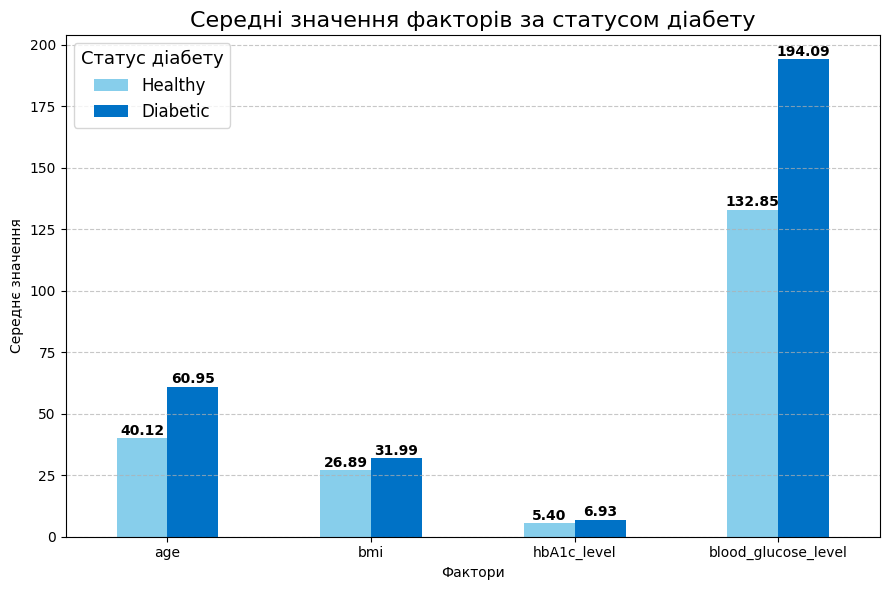

In [ ]:
grouped_means.T.plot(kind='bar', figsize=(9,6), color=['skyblue', '#0072C6'])

plt.title('Середні значення факторів за статусом діабету', fontsize=16)
plt.ylabel('Середнє значення')
plt.xlabel('Фактори')
plt.xticks(rotation=0)
plt.legend(['Healthy', 'Diabetic'], title='Статус діабету', fontsize=12, title_fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Підписи зверху стовпчиків
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.1,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()
plt.show()


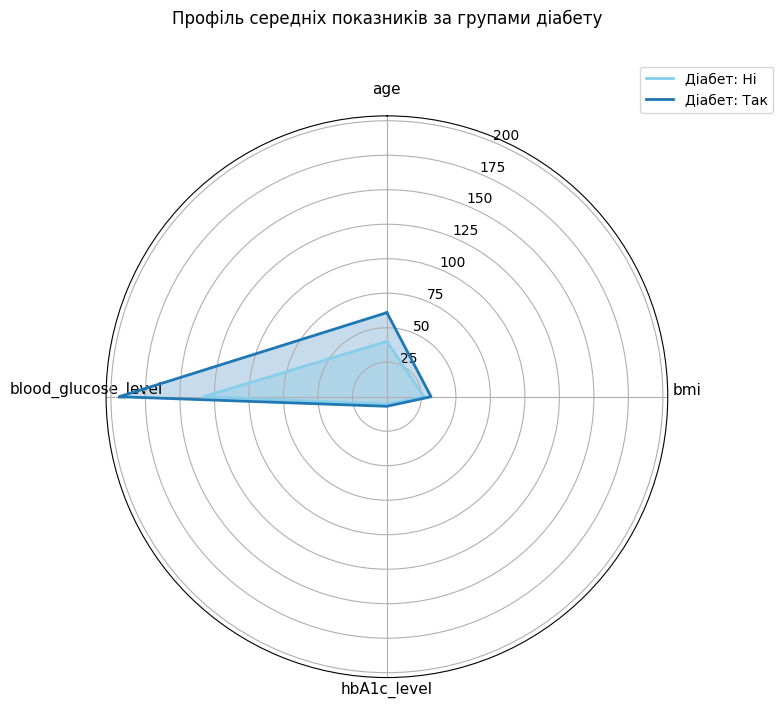

In [ ]:
labels = grouped_means.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = {
    1: '#1f77b4',   # синій – Діабет: Так
    0: '#87CEEB'    # блакитний (SkyBlue) – Діабет: Ні
}

for group_name, row in grouped_means.iterrows():
    values = row.tolist() + [row.tolist()[0]]
    label = f"Діабет: {'Так' if group_name == 1 else 'Ні'}"
    color = colors[group_name]

    ax.plot(angles, values, label=label, color=color, linewidth=2)
    ax.fill(angles, values, color=color, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('Профіль середніх показників за групами діабету', y=1.15)

for label in ax.get_xticklabels():
    label.set_fontsize(11)
    label.set_horizontalalignment('center')
    label.set_verticalalignment('bottom')

ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


Середній вік, індекс маси тіла (BMI), рівень глікованого гемоглобіну (HbA1c) та глюкози в крові є помітно вищими у пацієнтів з діабетом порівняно з тими, хто не має цього діагнозу.
Зокрема, середній вік у групі з діабетом становить 60.9 року, що на понад 20 років більше, ніж у групі без діабету (40.1).
Середній BMI у діабетиків — 31.99, що відповідає ожирінню, тоді як у здорових — 26.89 (надмірна вага).
Рівень HbA1c та глюкоза також вищі у групі з діабетом: 6.93% проти 5.40% і 194.1 мг/дл проти 132.9 мг/дл відповідно.

In [ ]:
a_m = diabetes_dataset.groupby('diabetes')['age'].agg(['min', 'max'])
a_m

,min,max
diabetes,,
0,0.08,80.0
1,3.00,80.0


In [ ]:
diabetes_dataset.loc[diabetes_dataset['age'].idxmin()]


,658
year,2019
gender,Male
age,0.08
location,Alabama
race:AfricanAmerican,1
race:Asian,0
race:Caucasian,0
race:Hispanic,0
race:Other,0
hypertension,0


####Уточнення по категоріях курців:
- current = курить зараз
- former = кинутий курець
- ever = колись курив, може включати як former, так і current
- not current = зараз не курить, але раніше міг — можливо ≈ former
- never = ніколи не курив
- No Info = не вказано / пропущені дані

In [ ]:
smoking_table = diabetes_dataset.groupby('diabetes')['smoking_history'].value_counts().unstack().fillna(0)
print(smoking_table)

smoking_history  No Info  current  ever  former  never  not current
diabetes                                                           
0                  34362     8338  3532    7762  31749         5757
1                   1454      948   472    1590   3346          690


In [ ]:
# Розрахунок часток для кожної групи
smoking_dist = diabetes_dataset.groupby(['diabetes', 'smoking_history']).size().unstack().fillna(0)

# Перетворюємо в частки від кожної групи (0 і 1)
smoking_percent = smoking_dist.div(smoking_dist.sum(axis=1), axis=0) * 100

print('Частки куріння у групах діабет / здорові (у %):')
print(smoking_percent.round(2))


Частки куріння у групах діабет / здорові (у %):
smoking_history  No Info  current  ever  former  never  not current
diabetes                                                           
0                  37.55     9.11  3.86    8.48  34.70         6.29
1                  17.11    11.15  5.55   18.71  39.36         8.12


#### Додано більш зрозумілі та однозначні категорії для кращої ідентифікації статусу куріння.

In [ ]:
def simplify_smoking(value):
    if value in ['current']:
        return 'current'
    elif value in ['former', 'not current', 'ever']:
        return 'former'
    elif value == 'never':
        return 'never'
    else:
        return 'unknown'

diabetes_dataset['smoking_simplified'] = diabetes_dataset['smoking_history'].apply(simplify_smoking)


#### Ця функція simplify_smoking об’єднує детальні категорії історії куріння у спрощені для легшого аналізу:
- 'current' — люди, які курять зараз.
- 'former' — люди, які колись курили (категорії 'former', 'not current', 'ever').
- 'never' — люди, які ніколи не курили.
- 'unknown' — відсутня або нечітка інформація про куріння.

Розподіл типів куріння серед пацієнтів з діабетом та без.

In [ ]:
smoking_percent_T = smoking_percent.T.reset_index().melt(id_vars='smoking_history')

In [ ]:
smoking_percent_T

,smoking_history,diabetes,value
0,No Info,0,37.554098
1,current,0,9.112568
2,ever,0,3.860109
3,former,0,8.483060
4,never,0,34.698361
5,not current,0,6.291803
6,No Info,1,17.105882
7,current,1,11.152941
8,ever,1,5.552941
9,former,1,18.705882


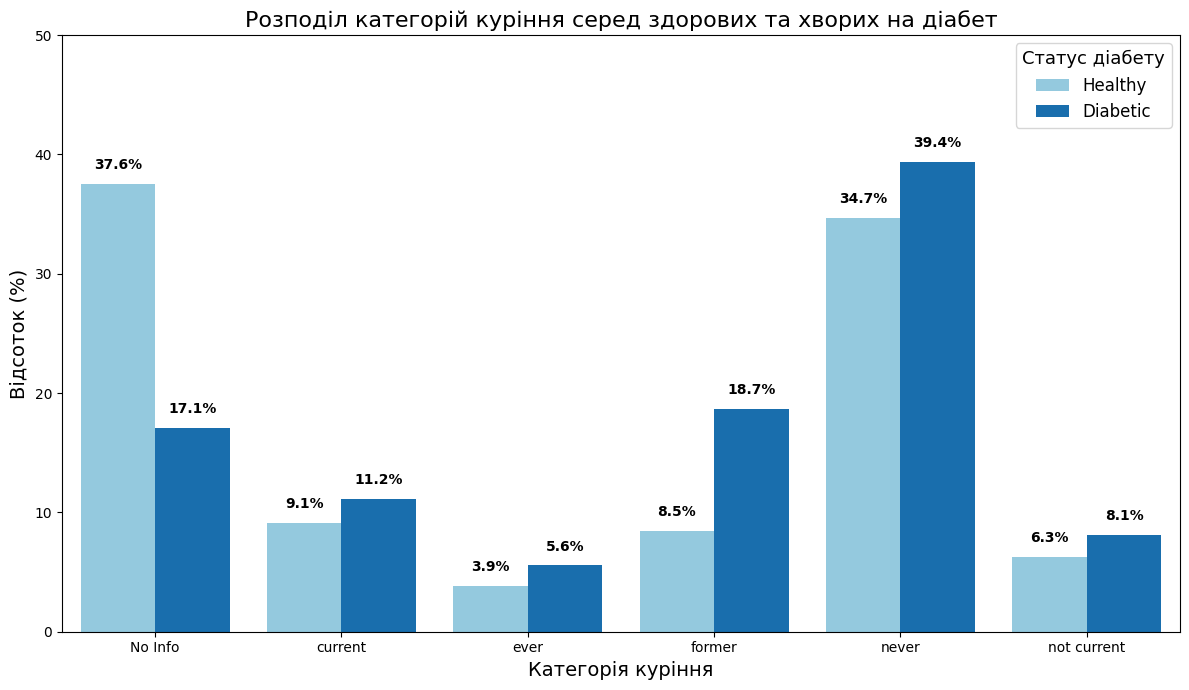

In [ ]:
plt.figure(figsize=(12,7))

# Переіменування для читабельності
smoking_percent_T['diabetes'] = smoking_percent_T['diabetes'].map({0: 'Healthy', 1: 'Diabetic'})

# Створення grouped barplot (для кращого порівняння)
sns.barplot(
    data=smoking_percent_T,
    x='smoking_history',
    y='value',
    hue='diabetes',
    palette={'Healthy':'skyblue', 'Diabetic':'#0072C6'}
)

plt.title('Розподіл категорій куріння серед здорових та хворих на діабет', fontsize=16)
plt.xlabel('Категорія куріння', fontsize=14)
plt.ylabel('Відсоток (%)', fontsize=14)
plt.legend(title='Статус діабету', fontsize=12, title_fontsize=13)
#plt.xticks(rotation=45)
plt.ylim(0, 50)

# Додати підписи зверху стовпчиків
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 3:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 1,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10,
            weight='bold'
        )

plt.tight_layout()
plt.show()


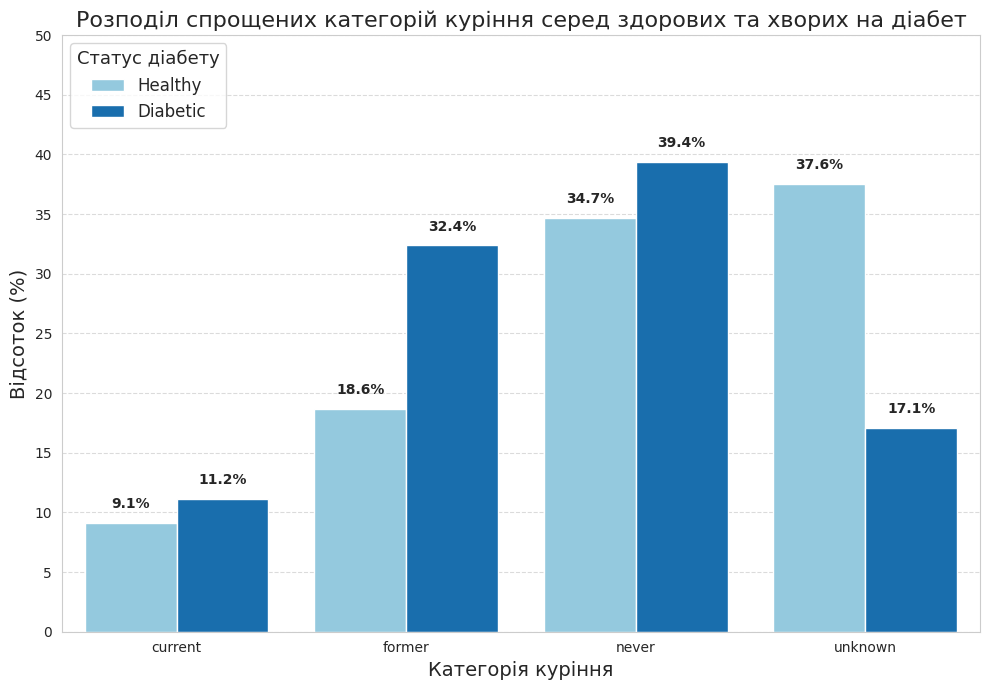

In [ ]:
# Розрахунок часток для нової категорії smoking_simplified
smoking_dist_simple = diabetes_dataset.groupby(['diabetes', 'smoking_simplified']).size().unstack().fillna(0)
smoking_percent_simple = smoking_dist_simple.div(smoking_dist_simple.sum(axis=1), axis=0) * 100

# Підготовка даних для seaborn
df_plot = smoking_percent_simple.T.reset_index().melt(id_vars='smoking_simplified')
df_plot['diabetes'] = df_plot['diabetes'].map({0: 'Healthy', 1: 'Diabetic'})

# Візуалізація
plt.figure(figsize=(10,7))
sns.barplot(
    data=df_plot,
    x='smoking_simplified',
    y='value',
    hue='diabetes',
    palette={'Healthy':'skyblue', 'Diabetic':'#0072C6'}
)

plt.title('Розподіл спрощених категорій куріння серед здорових та хворих на діабет', fontsize=16)
plt.xlabel('Категорія куріння', fontsize=14)
plt.ylabel('Відсоток (%)', fontsize=14)
plt.legend(title='Статус діабету', fontsize=12, title_fontsize=13, loc='upper left')
plt.ylim(0, 50)
plt.yticks(range(0, 51, 5))  # мітки від 0 до 50 з кроком 5
plt.grid(axis='y', linestyle='--', alpha=0.7)  # додатково сітка по осі Y

# Підписи на стовпчиках
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 3:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 1,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10,
            weight='bold'
        )

plt.tight_layout()
plt.show()


Серед здорових пацієнтів найбільшу частку становлять:
особи з невідомим статусом куріння ("No Info") — 37.6%
ті, хто ніколи не курив ("Never") — 34.7%
Поточні курці ("Current") становлять 9.1%, а колишні — 8.5%.
Усі категорії, пов’язані з курінням (former, current, ever, not current), мають нижчі значення, ніж у пацієнтів з діабетом.

Серед пацієнтів із діабетом найбільшу частку становлять ті, хто ніколи не курив (39.4%). Проте сукупна частка осіб із різним курильним бекграундом є значною:
Колишні курці (former) — 18.7%
Поточні курці (current) — 11.2%
Інші категорії, пов’язані з курінням (ever, not current) — ще ~13.7%
Отже, понад 40% діабетиків мають або мали досвід куріння, що підтверджує важливість врахування цього фактора при профілактиці та лікуванні.
Крім того, 17.1% даних про куріння відсутні, що вказує на потребу покращення збору анамнестичних даних у клінічній практиці.

Загалом, серед осіб з діабетом спостерігається вища частка нинішніх та колишніх курців, що може свідчити про зв’язок між курінням та ризиком розвитку діабету, або про зміну звичок після встановлення діагнозу.

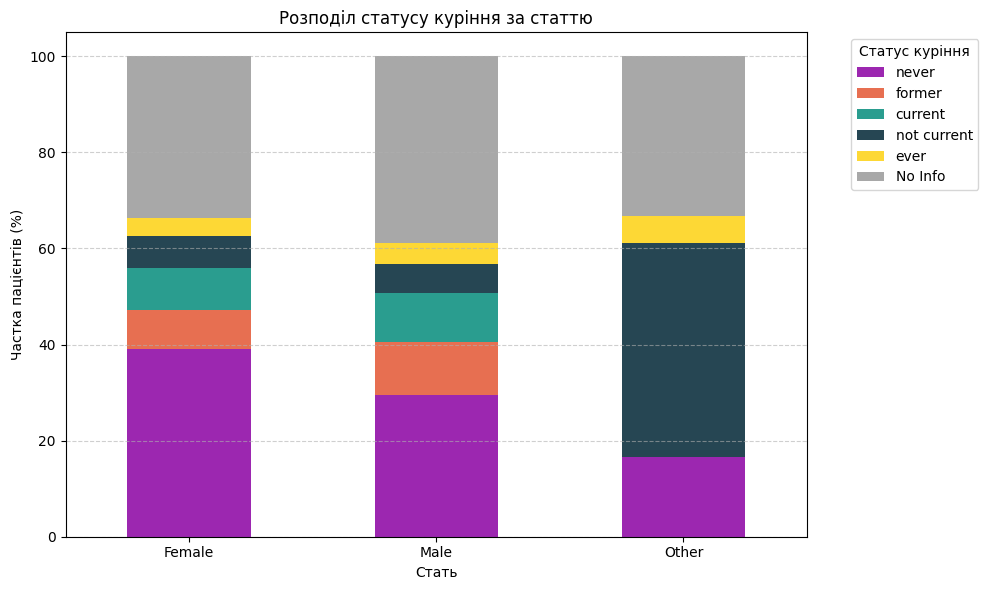

In [ ]:
# Крок 1: Підрахунок кількості пацієнтів у кожній категорії
smoking_gender = (
    diabetes_dataset.groupby(['gender', 'smoking_history'])
    .size()
    .reset_index(name='count')
)

# Крок 2: Розрахунок відсотків у межах кожної статі
smoking_gender['percent'] = smoking_gender.groupby('gender')['count'].transform(lambda x: 100 * x / x.sum())

# Крок 3: Pivot таблиця для stacked bar
pivot_gender_smoking = smoking_gender.pivot(index='gender', columns='smoking_history', values='percent')
pivot_gender_smoking = pivot_gender_smoking.fillna(0)

# Крок 4: Побудова stacked bar
colors = {
    'never': '#9C27B0',        # помаранчевий
    'former': '#E76F51',       # теракотовий (темно-червоний)
    'current': '#2A9D8F',      # бірюзовий
    'not current': '#264653',  # графітовий/темно-сірий
    'ever': '#FDD835',         # світло-коричневий
    'No Info': '#A8A8A8'       # сірий
}

# Гарантуємо, що колонки в правильному порядку
ordered_columns = ['never', 'former', 'current', 'not current', 'ever', 'No Info']
pivot_gender_smoking = pivot_gender_smoking[ordered_columns]

# Побудова графіка
pivot_gender_smoking.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[colors[col] for col in ordered_columns]
)

# Підписи
plt.title('Розподіл статусу куріння за статтю')
plt.xlabel('Стать')
plt.ylabel('Частка пацієнтів (%)')
plt.xticks(rotation=0)
plt.legend(title='Статус куріння', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
comorbidity_counts = diabetes_dataset.groupby(['diabetes', 'hypertension', 'heart_disease']).size()
print(comorbidity_counts)

diabetes  hypertension  heart_disease
0         0             0                83986
                        1                 2117
          1             0                 4839
                        1                  558
1         0             0                 5503
                        1                  909
          1             0                 1730
                        1                  358
dtype: int64


In [ ]:
for status in [0, 1]:
    print(f'Коморбідність при diabetes = {status}')
    subset = diabetes_dataset[diabetes_dataset['diabetes'] == status]
    crosstab = pd.crosstab(subset['hypertension'], subset['heart_disease'])
    print(crosstab)
    print()

Коморбідність при diabetes = 0
heart_disease      0     1
hypertension              
0              83986  2117
1               4839   558

Коморбідність при diabetes = 1
heart_disease     0    1
hypertension            
0              5503  909
1              1730  358



Загальна частка гіпертонії та серцевих хвороб

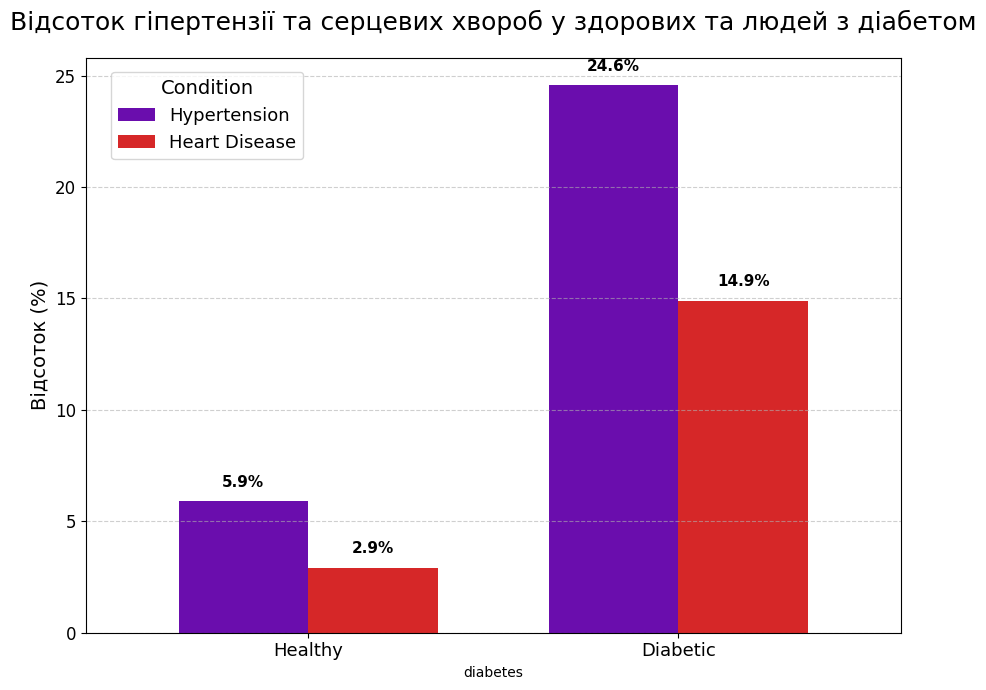

In [ ]:
# Розрахунок відсотків з гіпертензією і серцевими хворобами в групах діабету
comorbidity = diabetes_dataset.groupby('diabetes')[['hypertension', 'heart_disease']].mean() * 100

# Кольори: гіпертензія — фіолетовий, серцеві хвороби — червоний
colors = ['#6a0dad', '#d62728']  # фіолетовий і червоний

# Збільшуємо фігуру для уникнення перекриття
fig, ax = plt.subplots(figsize=(9, 7))

comorbidity.plot(kind='bar', color=colors, width=0.7, ax=ax)

# Заголовок та осі
plt.title('Відсоток гіпертензії та серцевих хвороб у здорових та людей з діабетом', fontsize=18, pad=20)
plt.ylabel('Відсоток (%)', fontsize=14)
plt.xticks([0, 1], ['Healthy', 'Diabetic'], rotation=0, fontsize=13)
plt.yticks(fontsize=12)

# Додаємо сітку
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Додаємо значення над стовпчиками
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.5,  # трохи більше відступу
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=11,
        weight='bold'
    )

# Переносимо легенду вліво (зовні графіка)
plt.legend(
    ['Hypertension', 'Heart Disease'],
    fontsize=13,
    title='Condition',
    title_fontsize=14,
    loc='center left',
    bbox_to_anchor=(0.02, 0.9)
)

plt.tight_layout()
plt.show()


Розподіл комбінацій захворювань

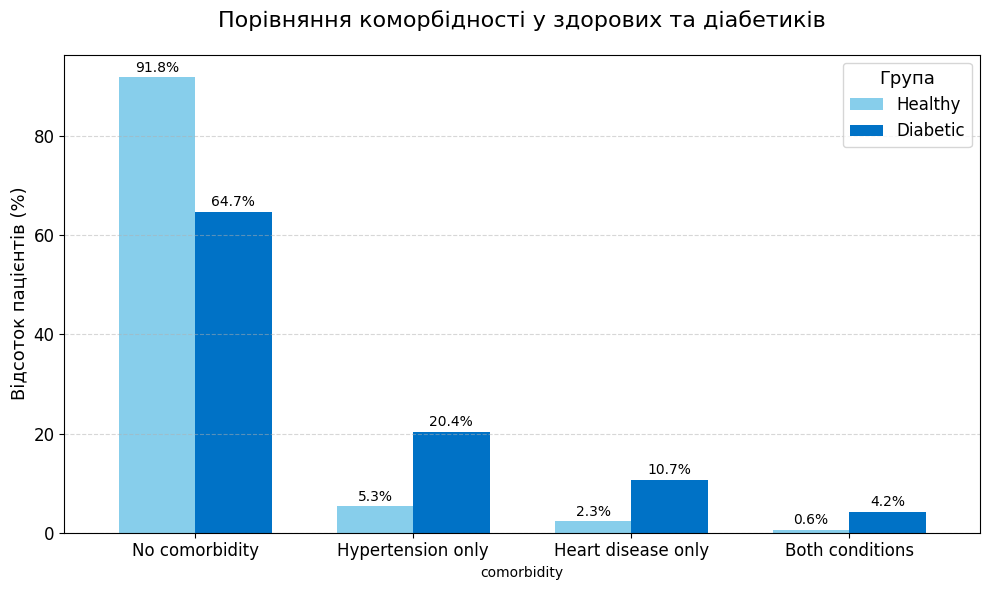

In [ ]:
# Класифікація коморбідності
def classify(row):
    if row['hypertension'] == 0 and row['heart_disease'] == 0:
        return 'No comorbidity'
    elif row['hypertension'] == 1 and row['heart_disease'] == 0:
        return 'Hypertension only'
    elif row['hypertension'] == 0 and row['heart_disease'] == 1:
        return 'Heart disease only'
    else:
        return 'Both conditions'

# Створити нову колонку
diabetes_dataset['comorbidity'] = diabetes_dataset.apply(classify, axis=1)

# Групуємо по діабету та типу коморбідності
grouped = diabetes_dataset.groupby(['comorbidity', 'diabetes']).size().reset_index(name='count')

# Обчислюємо відсоток всередині кожної групи діабету
total_per_diabetes = grouped.groupby('diabetes')['count'].transform('sum')
grouped['percent'] = grouped['count'] / total_per_diabetes * 100

# Переформатуємо таблицю: коморбідність — рядки, diabetes — колонки
pivot = grouped.pivot(index='comorbidity', columns='diabetes', values='percent')

# Перейменовуємо колонки для зрозумілості
pivot.columns = ['Healthy', 'Diabetic']

# Сортуємо категорії у логічному порядку
pivot = pivot.loc[['No comorbidity', 'Hypertension only', 'Heart disease only', 'Both conditions']]

# Побудова графіка
ax = pivot.plot(kind='bar', figsize=(10, 6), width=0.7, color=['skyblue', '#0072C6'])

# Підписи
plt.title('Порівняння коморбідності у здорових та діабетиків', fontsize=16, pad=20)
plt.ylabel('Відсоток пацієнтів (%)', fontsize=13)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Легенда
plt.legend(title='Група', title_fontsize=13, fontsize=12)

# Додаємо підписи над стовпцями
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- серед осіб без діабету 91.8% не мають гіпертензії чи серцевих захворювань, у той час як серед діабетиків таких лише 64.7%.
- гіпертонія без супутньої серцевої патології спостерігається у 5.3% здорових та 20.4% діабетиків.
- серцеві захворювання без гіпертонії є у 2.3% здорових і 10.7% діабетиків.
- водночас поєднання гіпертонії та серцевої патології трапляється лише у 0.6% здорових, але вже у 4.2% хворих на діабет.

Частота гіпертонії та серцевих захворювань, а також їх поєднання, є суттєво вищою серед пацієнтів із діабетом порівняно зі здоровими. Це свідчить про високий рівень коморбідності в цій групі, що, своєю чергою, може ускладнювати перебіг діабету та підвищувати загальні ризики для здоров’я.

Аналіз гендерного розподілу

In [ ]:
total_counts = diabetes_dataset['gender'].value_counts(normalize=True) * 100
print(total_counts)


gender
Female    58.552
Male      41.430
Other      0.018
Name: proportion, dtype: float64


In [ ]:
# Загальний розподіл гендеру
total_counts = diabetes_dataset['gender'].value_counts(normalize=True) * 100

# Розподіл гендеру у групах diabetes
grouped_counts = diabetes_dataset.groupby('diabetes')['gender'].value_counts(normalize=True) * 100

print('Загальний розподіл гендеру:')
print(total_counts.round(2))
print('\nРозподіл гендеру по групах діабету:')
print(grouped_counts.round(2))


Загальний розподіл гендеру:
gender
Female    58.55
Male      41.43
Other      0.02
Name: proportion, dtype: float64

Розподіл гендеру по групах діабету:
diabetes  gender
0         Female    59.12
          Male      40.86
          Other      0.02
1         Female    52.48
          Male      47.52
Name: proportion, dtype: float64


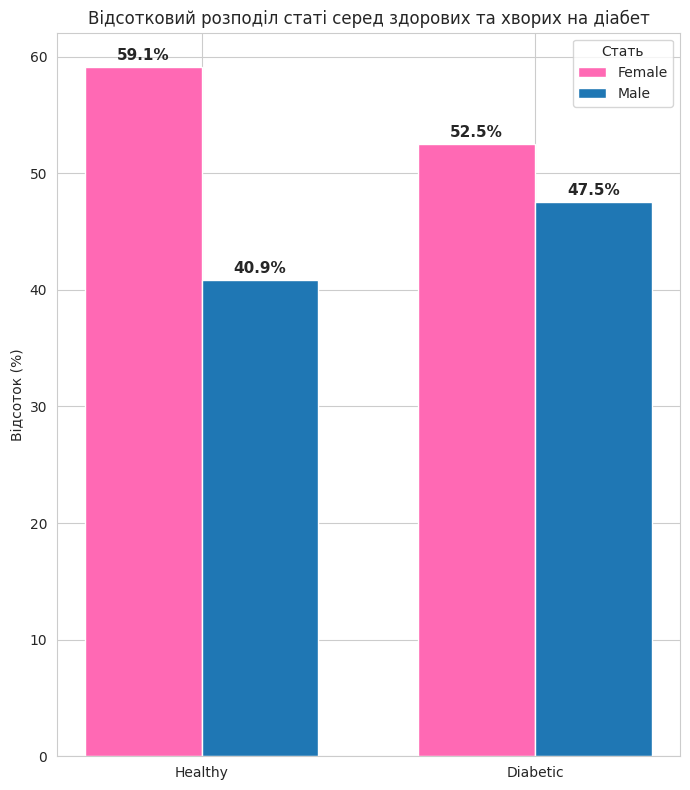

In [ ]:
# Перевести у відсотки від загальної кількості у кожній групі diabetes
percentages = grouped_counts.unstack()

# Позиції для двох груп (здорові, діабет)
x = np.arange(len(percentages))  # [0, 1]
width = 0.35
fig, ax = plt.subplots(figsize=(7,8))

# Створюємо два стовпчики поруч в кожній групі (жіночий і чоловічий)
bars_female = ax.bar(x - width/2, percentages['Female'], width, label='Female', color='#ff69b4')
bars_male = ax.bar(x + width/2, percentages['Male'], width, label='Male', color='#1f77b4')

# Підписи на осі X
ax.set_xticks(x)
ax.set_xticklabels(['Healthy', 'Diabetic'])

ax.set_ylabel('Відсоток (%)')
ax.set_title('Відсотковий розподіл статі серед здорових та хворих на діабет')

ax.legend(title='Стать')

# Додати підписи значень на стовпчики
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=11, fontweight='bold')

add_labels(bars_female)
add_labels(bars_male)

plt.tight_layout()
plt.show()


- у загальній популяції пацієнтів переважають жінки (58.6%).
- водночас, серед осіб із діабетом частка чоловіків помітно вища (47.5%) порівняно з їх часткою серед здорових (40.9%).
- така зміна може вказувати на гендерну нерівність у розвитку діабету, можливо пов'язану з поведінковими, соціальними чи біологічними чинниками.

Примітка: За останні два роки в даних спостерігалася вибірка, яка включала лише чоловіків. Це могло вплинути на загальне співвідношення статей серед пацієнтів із діабетом, зумовивши більшу частку чоловіків у цій групі.

Розподіл пацієнтів за расою та статусом діабету

In [ ]:
# Створюємо колонку 'race' на основі бінарних стовпців
def get_race(row):
    if row['race:AfricanAmerican'] == 1:
        return 'African American'
    elif row['race:Asian'] == 1:
        return 'Asian'
    elif row['race:Caucasian'] == 1:
        return 'Caucasian'
    elif row['race:Hispanic'] == 1:
        return 'Hispanic'
    elif row['race:Other'] == 1:
        return 'Other'
    else:
        return 'Unknown'

diabetes_dataset['race'] = diabetes_dataset.apply(get_race, axis=1)


In [ ]:
print(diabetes_dataset['race'].value_counts())


race
African American    20223
Asian               20015
Other               19998
Hispanic            19888
Caucasian           19876
Name: count, dtype: int64


In [ ]:
print(diabetes_dataset['diabetes'].value_counts())


diabetes
0    91500
1     8500
Name: count, dtype: int64


In [ ]:
race_diabetes_counts = diabetes_dataset.groupby(['race', 'diabetes']).size().unstack(fill_value=0)
print(race_diabetes_counts)


diabetes              0     1
race                         
African American  18455  1768
Asian             18272  1743
Caucasian         18206  1670
Hispanic          18212  1676
Other             18355  1643


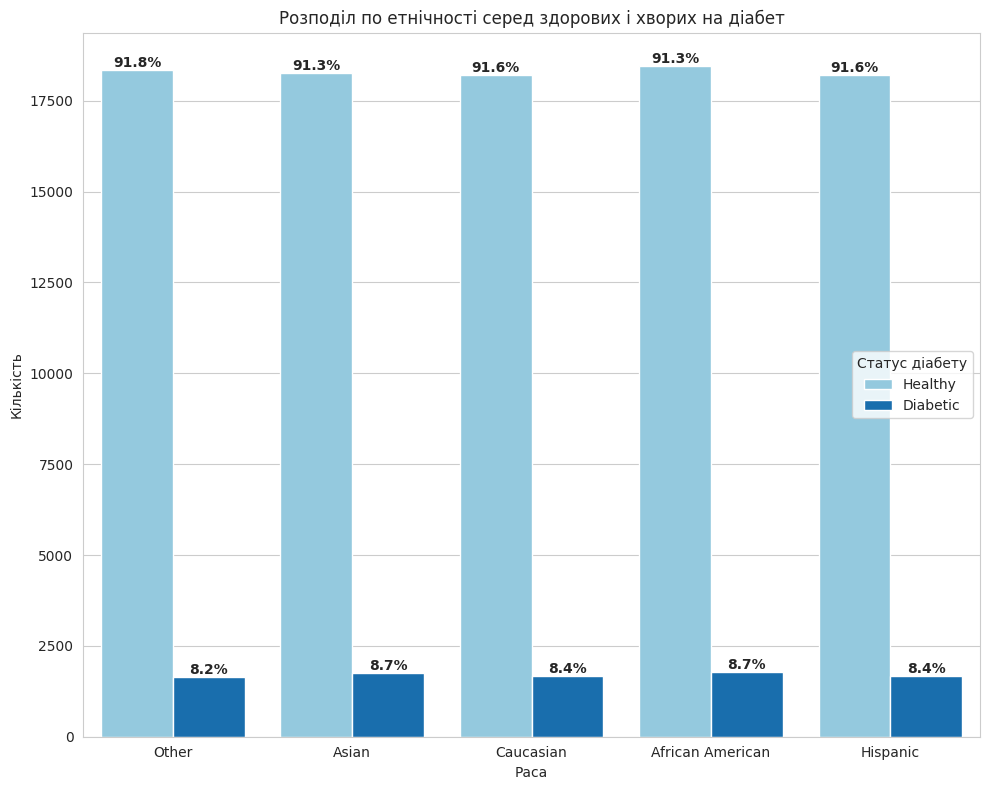

In [ ]:
plt.figure(figsize=(10,8))

# Побудова графіка
ax = sns.countplot(data=diabetes_dataset, x='race', hue='diabetes', palette=['skyblue', '#0072C6'])

plt.title('Розподіл по етнічності серед здорових і хворих на діабет')
plt.xlabel('Раса')
plt.ylabel('Кількість')
plt.legend(title='Статус діабету', labels=['Healthy', 'Diabetic'])
plt.tight_layout()

# Розрахунок сум для кожної раси (щоб перетворити в відсотки)
race_diabetes_counts = diabetes_dataset.groupby(['race', 'diabetes']).size().unstack(fill_value=0)

# Загальна кількість по кожній расі (для відсотків)
race_totals = race_diabetes_counts.sum(axis=1)

# Додаємо підписи у відсотках
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        # x позиція
        x = p.get_x() + p.get_width() / 2
        # y позиція (висота стовпчика)
        y = height

        # Отримаємо назву раси та статус діабету з координат пати
        race = p.get_x() + p.get_width()/2

        # Для спрощення знайдемо індекс по порядку:
        idx = int(p.get_x() + 0.5)

        # Знайдемо статус діабету (hue) за кольором
        diabetes_status = 0 if p.get_facecolor() == (0.0, 0.4470588235294118, 0.7411764705882353, 1.0) else 1
        # (або просто беремо за порядком патчів)

        # Визначаємо расу за індексом
        races = diabetes_dataset['race'].unique()
        race_name = races[idx]

        # Відсоток
        percent = (height / race_totals[race_name]) * 100

        ax.text(x, y + 5, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


Розподіл пацієнтів за расовою приналежністю є відносно рівномірним у групах з діабетом і без. Відсотковий склад показує схожу частку представників афроамериканської, азіатської, кавказької, іспанської (Hispanic) та інших рас у кожній групі.

/tmp/ipython-input-3992887634.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diabetes_corr.values, y=diabetes_corr.index, palette='coolwarm')


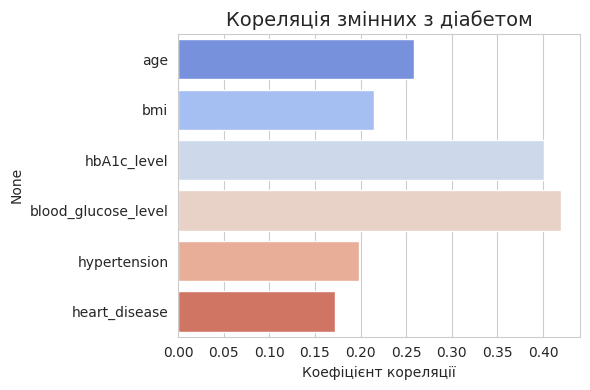

In [ ]:
# Вибір числових змінних
numerical_features = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level',
                      'hypertension', 'heart_disease']

# Додаємо diabetes, бо це наша цільова змінна
corr_with_diabetes = diabetes_dataset[numerical_features + ['diabetes']].corr()

# Витягуємо лише кореляції з "diabetes"
diabetes_corr = corr_with_diabetes['diabetes'].drop('diabetes')  # без самої себе

plt.figure(figsize=(6,4))
sns.barplot(x=diabetes_corr.values, y=diabetes_corr.index, palette='coolwarm')
plt.title('Кореляція змінних з діабетом', fontsize=14)
plt.xlabel('Коефіцієнт кореляції')
plt.tight_layout()
plt.show()


In [ ]:
# Вибір числових змінних
numerical_features = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level',
                      'hypertension', 'heart_disease']

# Розрахунок кореляції
correlation_table = diabetes_dataset[numerical_features + ['diabetes']].corr()

# Витягуємо лише кореляції з діабетом (без самої себе)
diabetes_corr = correlation_table['diabetes'].drop('diabetes').sort_values(ascending=False)

# Перетворюємо в DataFrame для зручного перегляду
diabetes_corr_df = diabetes_corr.reset_index()
diabetes_corr_df.columns = ['Змінна', 'Кореляція з діабетом']

# Вивід
print(diabetes_corr_df)


                Змінна  Кореляція з діабетом
0  blood_glucose_level              0.419558
1          hbA1c_level              0.400660
2                  age              0.258008
3                  bmi              0.214357
4         hypertension              0.197823
5        heart_disease              0.171727


Розподіл статусу діабету за категоріями індексу маси тіла (BMI)

In [ ]:
# Визначаємо інтервали для BMI та мітки категорій
bmi_bins = [0, 18.5, 24.9, 29.9, 100]  # Крайні межі: недовага, норма, надмірна вага, ожиріння
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

# Додаємо колонку з категоріями BMI
diabetes_dataset['bmi_group'] = pd.cut(diabetes_dataset['bmi'], bins=bmi_bins, labels=bmi_labels, right=True, include_lowest=True)

# Перевіряємо результат
print(diabetes_dataset[['bmi', 'bmi_group']].head(10))

     bmi      bmi_group
0  27.32     Overweight
1  19.95  Normal weight
2  23.76  Normal weight
3  27.32     Overweight
4  23.75  Normal weight
5  27.32     Overweight
6  24.34  Normal weight
7  20.98  Normal weight
8  38.14          Obese
9  27.32     Overweight


In [ ]:
bmi_diabetes_counts = diabetes_dataset.groupby(['bmi_group', 'diabetes'], observed=True).size().unstack(fill_value=0)
print(bmi_diabetes_counts)

diabetes           0     1
bmi_group                 
Underweight     8457    64
Normal weight  20992   839
Overweight     42448  3319
Obese          19603  4278


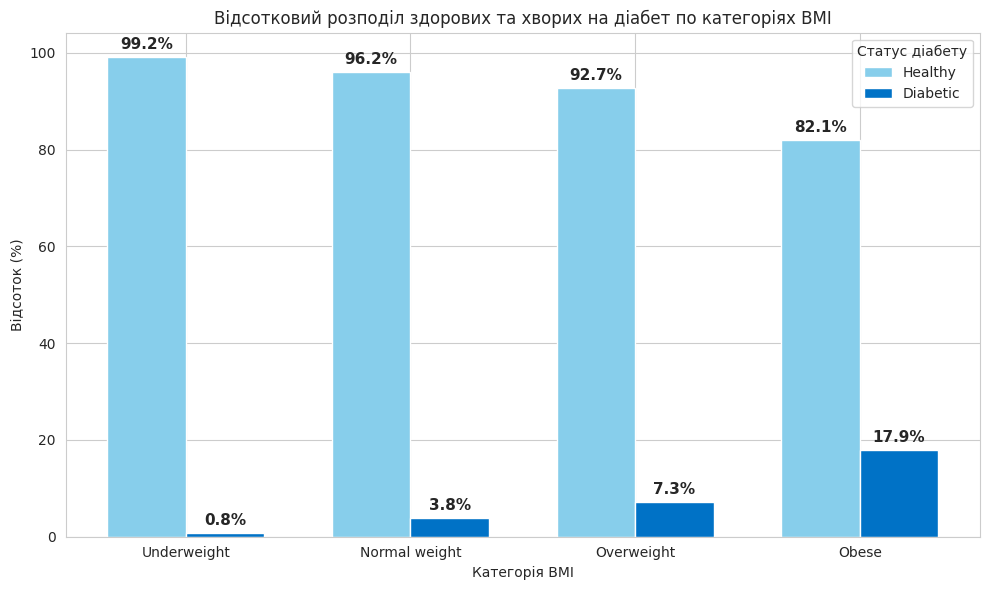

In [ ]:
# Групуємо і рахуємо кількість для bmi_group і diabetes
bmi_diabetes_counts = diabetes_dataset.groupby(['bmi_group', 'diabetes'], observed=True).size().unstack(fill_value=0)

# Розрахунок відсотків у межах кожної bmi_group
bmi_diabetes_percent = bmi_diabetes_counts.div(bmi_diabetes_counts.sum(axis=1), axis=0) * 100

x = np.arange(len(bmi_diabetes_counts))  # позиції груп (Underweight, Normal weight, ...)
width = 0.35  # ширина стовпчиків

fig, ax = plt.subplots(figsize=(10, 6))

bars_healthy = ax.bar(x - width/2, bmi_diabetes_percent[0], width, label='Healthy', color='skyblue')
bars_diabetic = ax.bar(x + width/2, bmi_diabetes_percent[1], width, label='Diabetic', color='#0072C6')

ax.set_xticks(x)
ax.set_xticklabels(bmi_diabetes_counts.index)
ax.set_ylabel('Відсоток (%)')
ax.set_xlabel('Категорія BMI')
ax.set_title('Відсотковий розподіл здорових та хворих на діабет по категоріях BMI')
ax.legend(title='Статус діабету')

# Додаємо підписи у відсотках над стовпчиками
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                f'{height:.1f}%',
                ha='center',
                va='bottom',
                fontsize=11,
                fontweight='bold'
            )

add_labels(bars_healthy)
add_labels(bars_diabetic)

plt.tight_layout()
plt.show()


###Географічний розподіл середнього BMI серед пацієнтів із діабетом у США

In [ ]:
state_name_to_code = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

In [ ]:
diabetic_data = diabetes_dataset[diabetes_dataset['diabetes'] == 1]

# Розрахунок середнього BMI по штатах
bmi_by_state = diabetic_data.groupby('location')['bmi'].mean().reset_index()
bmi_by_state.columns = ['state', 'avg_bmi']

# Додаємо колонку з кодами штатів
bmi_by_state['code'] = bmi_by_state['state'].map(state_name_to_code)

# Відфільтровуємо рядки без коду (якщо такі є)
bmi_by_state = bmi_by_state.dropna(subset=['code', 'avg_bmi'])

# Переконаємось, що коди у форматі рядка
bmi_by_state['code'] = bmi_by_state['code'].astype(str)

# Побудова інтерактивної карти
fig = px.choropleth(
    bmi_by_state,
    locations='code',
    locationmode='USA-states',
    color='avg_bmi',
    color_continuous_scale='Greens',
    scope='usa',
    labels={'avg_bmi': 'Середній BMI'},
    hover_name='state',
    title='Середній BMI по штатах серед пацієнтів з діабетом'
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    plot_bgcolor='white'
)

fig.show()


- середній індекс маси тіла (BMI) серед пацієнтів із діабетом у США коливається від 30.8 до 32.99.
- найвищі значення зафіксовано у штатах Alabama (32.99), Texas (32.83) та Tennessee (32.83), що може свідчити про вищу поширеність надмірної ваги серед діабетиків у південних регіонах.
- у свою чергу, найнижчі середні значення спостерігаються у Wyoming (30.82), Wisconsin (31.02) та Georgia (31.03).
- такий регіональний розподіл може відображати як соціально-економічні, так і культурні відмінності в стилі харчування та доступі до медичних послуг.

Динаміка показників упродовж років

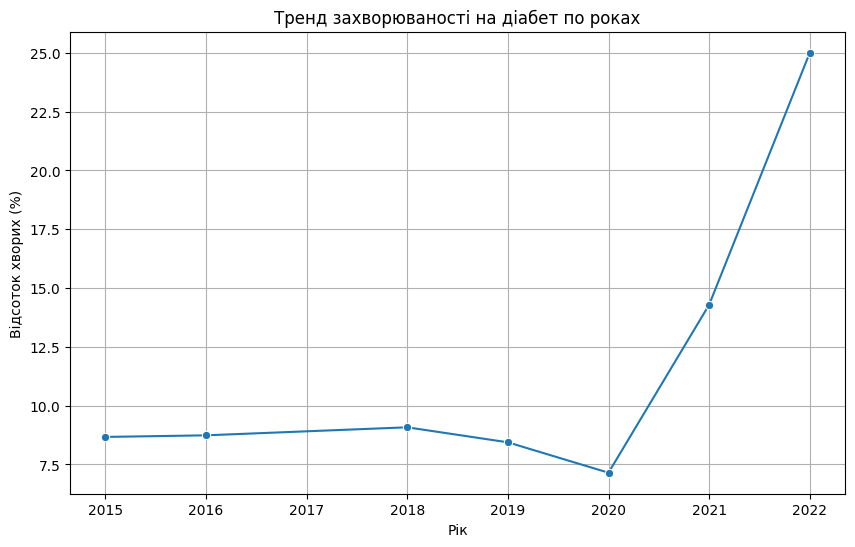

In [ ]:
# Розрахунок частки хворих на діабет у кожному році
diabetes_by_year = diabetes_dataset.groupby('year')['diabetes'].mean() * 100

plt.figure(figsize=(10,6))
sns.lineplot(x=diabetes_by_year.index, y=diabetes_by_year.values, marker='o')
plt.title('Тренд захворюваності на діабет по роках')
plt.xlabel('Рік')
plt.ylabel('Відсоток хворих (%)')
plt.grid(True)
plt.show()


- упродовж 2015–2019 років частка пацієнтів із діабетом залишалася відносно стабільною (приблизно 9%). Проте у 2020 році відбулося незначне зниження до 7%, і вже починаючи з 2021 року спостерігається різкий ріст: до 15% у 2021 та понад 25% у 2022 році.
- це може свідчити як про зміну поведінкових факторів після пандемії COVID-19, так і про кращу діагностику або структурні зміни у вибірці.
- або причиною зротання хворих на діабет міг стати COVID-19.

- COVID-19 може викликати метаболічні порушення — у частини пацієнтів після перенесеної інфекції виникали:
порушення толерантності до глюкози;
підвищення рівня HbA1c;
нові випадки діабету 2 типу навіть у людей без попередньої історії.
- стрес та гормональні зміни: Під час важкої форми COVID-19 організм переживає сильне запалення, що впливає на функції підшлункової залози (β-клітини), які виробляють інсулін.
- стероїдна терапія: Деяким пацієнтам із COVID-19 призначали кортикостероїди, які можуть спричиняти або погіршувати інсулінорезистентність.
- аслідки ізоляції: Після пандемії зросла частота малорухливого способу життя, стресів, порушення харчування — усе це також фактори ризику для діабету.
- у 2022–2023 рр. CDC (США) та Nature Reviews Endocrinology повідомляли про підвищений ризик нових випадків діабету протягом року після COVID-19, особливо серед дорослих.

Динаміка середніх клінічних показників пацієнтів (2015–2022)

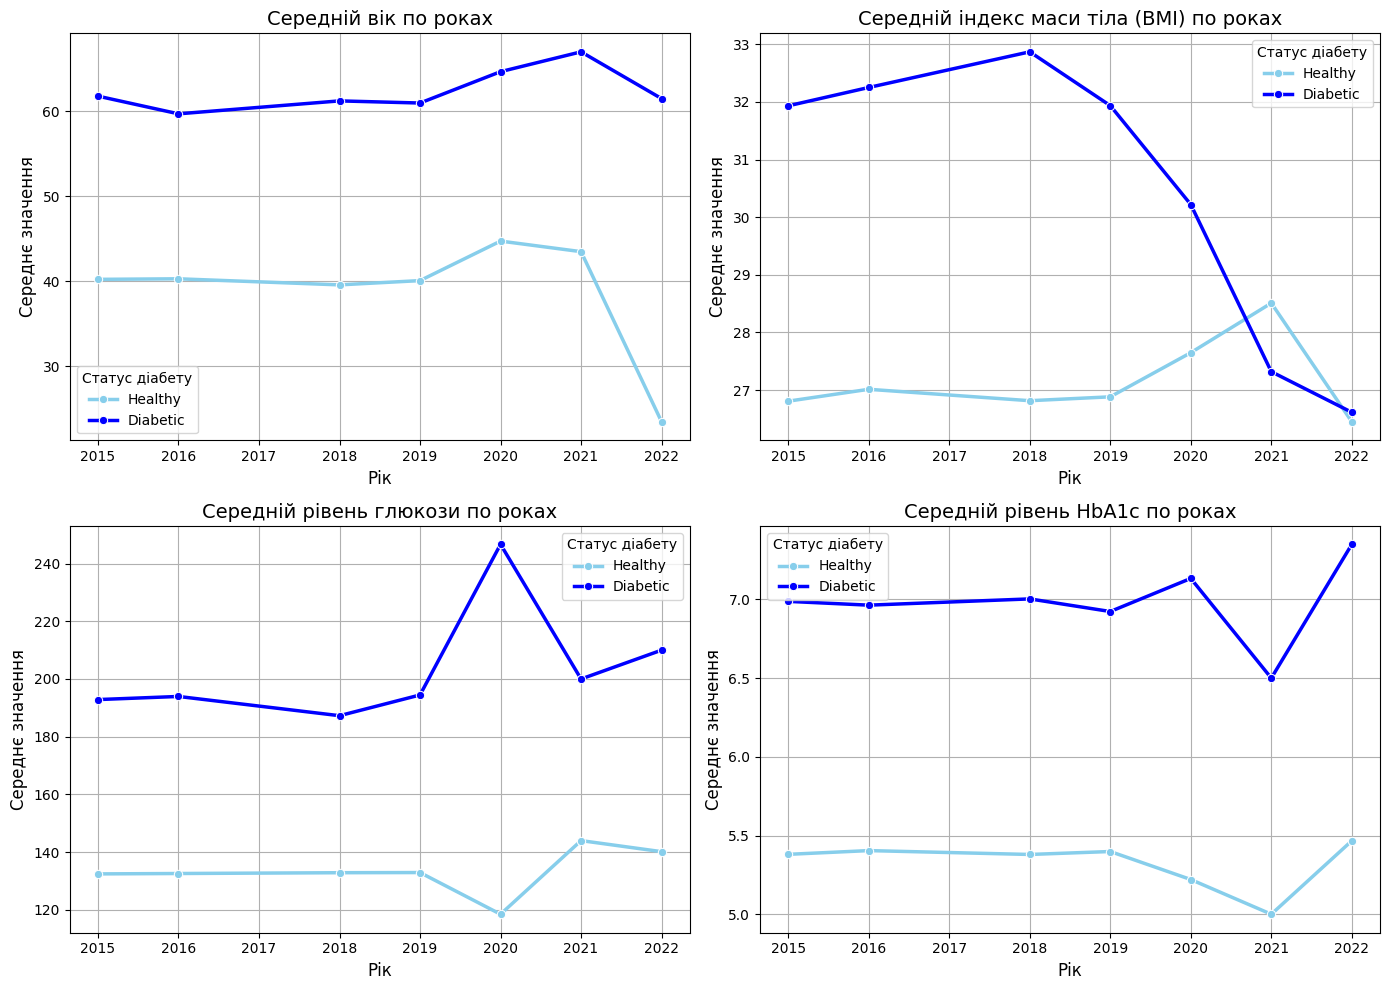

In [ ]:
avg_metrics = diabetes_dataset.groupby(['year', 'diabetes'])[
    ['age', 'bmi', 'blood_glucose_level', 'hbA1c_level']
].mean().reset_index()

avg_metrics['diabetes'] = avg_metrics['diabetes'].map({0: 'Healthy', 1: 'Diabetic'})

palette = {
    'Healthy': 'skyblue',
    'Diabetic': 'blue'
}

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['age', 'bmi', 'blood_glucose_level', 'hbA1c_level']
titles = [
    'Середній вік по роках',
    'Середній індекс маси тіла (BMI) по роках',
    'Середній рівень глюкози по роках',
    'Середній рівень HbA1c по роках'
]

for i, ax in enumerate(axs.flatten()):
    sns.lineplot(
        data=avg_metrics,
        x='year',
        y=metrics[i],
        hue='diabetes',
        palette=palette,
        marker='o',
        linewidth=2.5,
        ax=ax
    )
    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel('Рік', fontsize=12)
    ax.set_ylabel('Середнє значення', fontsize=12)
    ax.legend(title='Статус діабету')
    ax.grid(True)

plt.tight_layout()
plt.show()


- у період з 2015 по 2022 рік спостерігаються чіткі відмінності між пацієнтами з діабетом та без нього за віком, ІМТ, рівнем глюкози в крові та HbA1c.
- пацієнти з діабетом стабільно мають вищий вік, ІМТ, рівень глюкози та HbA1c, що підтверджує наявність метаболічних порушень.
- у 2020–2022 роках у пацієнтів із діабетом помітно зросли рівні глюкози та HbA1c, що може вказувати на погіршення контролю над хворобою, можливо, у зв’язку з пандемією COVID-19.
- для здорових пацієнтів показники залишаються більш стабільними, хоча у 2020–2021 роках спостерігається зростання віку та ІМТ, що також може бути наслідком змін способу життя під час пандемії.

Аналіз змін показників глюкози, гемоглобіну та індексу маси тіла (BMI) залежно від віку у здорових та пацієнтів з діабетом

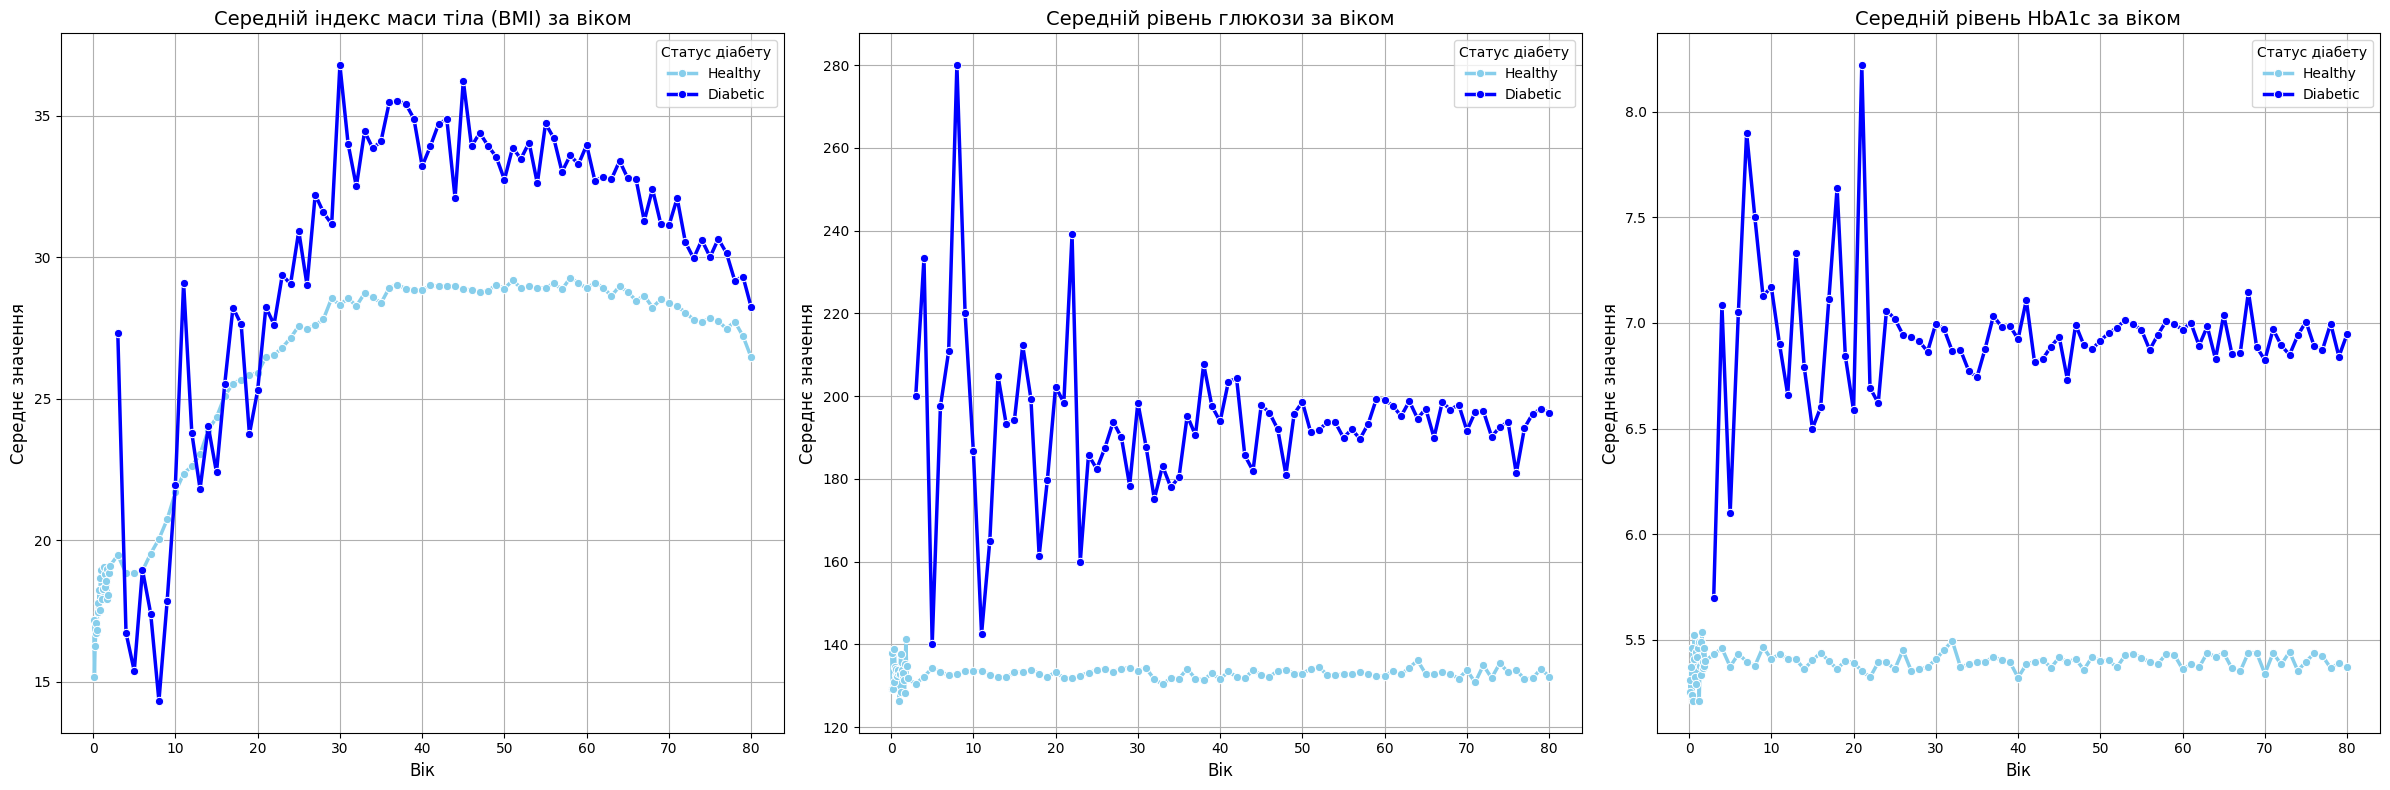

In [16]:
# 1. Групуємо за віком і діабетом, обчислюємо середні значення
avg_metrics = diabetes_dataset.groupby(['age', 'diabetes'])[
    ['bmi', 'blood_glucose_level', 'hbA1c_level']
].mean().reset_index()

# 2. Мапимо значення 0 → Healthy, 1 → Diabetic
avg_metrics['diabetes'] = avg_metrics['diabetes'].map({0: 'Healthy', 1: 'Diabetic'})

# 3. Визначаємо кольори
palette = {
    'Healthy': 'skyblue',
    'Diabetic': 'blue'
}

# 4. Список метрик та заголовків
metrics = ['bmi', 'blood_glucose_level', 'hbA1c_level']
titles = [
    'Середній індекс маси тіла (BMI) за віком',
    'Середній рівень глюкози за віком',
    'Середній рівень HbA1c за віком'
]

# 5. Створюємо графіки
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

for i, ax in enumerate(axs):
    sns.lineplot(
        data=avg_metrics,
        x='age',
        y=metrics[i],
        hue='diabetes',
        palette=palette,
        marker='o',
        linewidth=2.5,
        ax=ax
    )
    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel('Вік', fontsize=12)
    ax.set_ylabel('Середнє значення', fontsize=12)
    ax.legend(title='Статус діабету')
    ax.grid(True)

plt.tight_layout()
plt.show()


- BMI (індекс маси тіла):
для здорових пацієнтів BMI стабільний і коливається в межах ~26.4–28.5, без чіткої залежності від віку. Для людей з діабетом BMI вищий — у середньому 27–33, але з віком не спостерігається чіткого зростання чи зниження.
- рівень глюкози:
у здорових рівень глюкози порівняно стабільний, із невеликим спадом у 2020 році (~118) і потім зростає. У людей з діабетом рівень глюкози значно вищий, збільшується з віком, наприклад, з 187 (у 2018) до 246 (у 2020), із незначним падінням у 2021. Є помітний стрибок рівня глюкози у діабетиків близько 60-65 років.
- рівень HbA1c:
у здорових коливається близько 5–5.5, без значних змін із віком. У діабетиків HbA1c суттєво вищий (приблизно 6.5–7.3), із тенденцією до зростання у старших вікових групах. Пік HbA1c спостерігається приблизно в 60–65 років.

З віком у людей з діабетом спостерігається підвищення рівня глюкози та HbA1c, що свідчить про загострення або прогресування діабету в старшому віці (приблизно від 60 років). BMI у людей з діабетом вищий, ніж у здорових, але не має чіткої вікової залежності. У здорових людей показники відносно стабільні, без різких змін із віком.

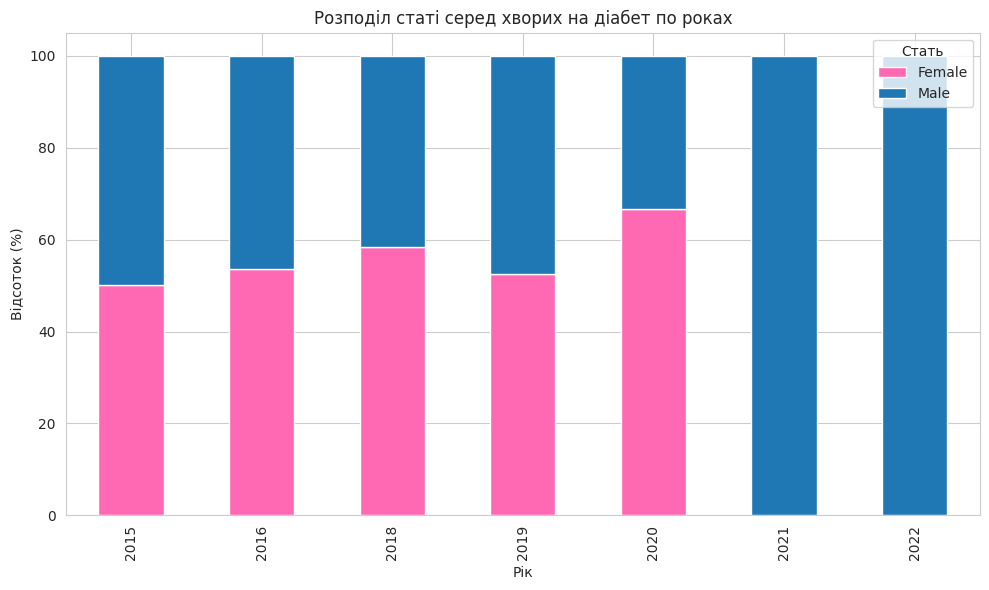

In [ ]:
# Вибираємо тільки хворих та створюємо копію
diabetic_data = diabetes_dataset[diabetes_dataset['diabetes'] == 1].copy()

# Розподіл за статтю по роках
gender_dist = diabetic_data.groupby(['year', 'gender']).size().unstack(fill_value=0)
gender_pct = gender_dist.div(gender_dist.sum(axis=1), axis=0) * 100

ax = gender_pct.plot(kind='bar', stacked=True, color=['#ff69b4','#1f77b4'], figsize=(10,6))
ax.set_title('Розподіл статі серед хворих на діабет по роках')
ax.set_ylabel('Відсоток (%)')
ax.set_xlabel('Рік')
plt.legend(title='Стать')
plt.tight_layout()
plt.show()

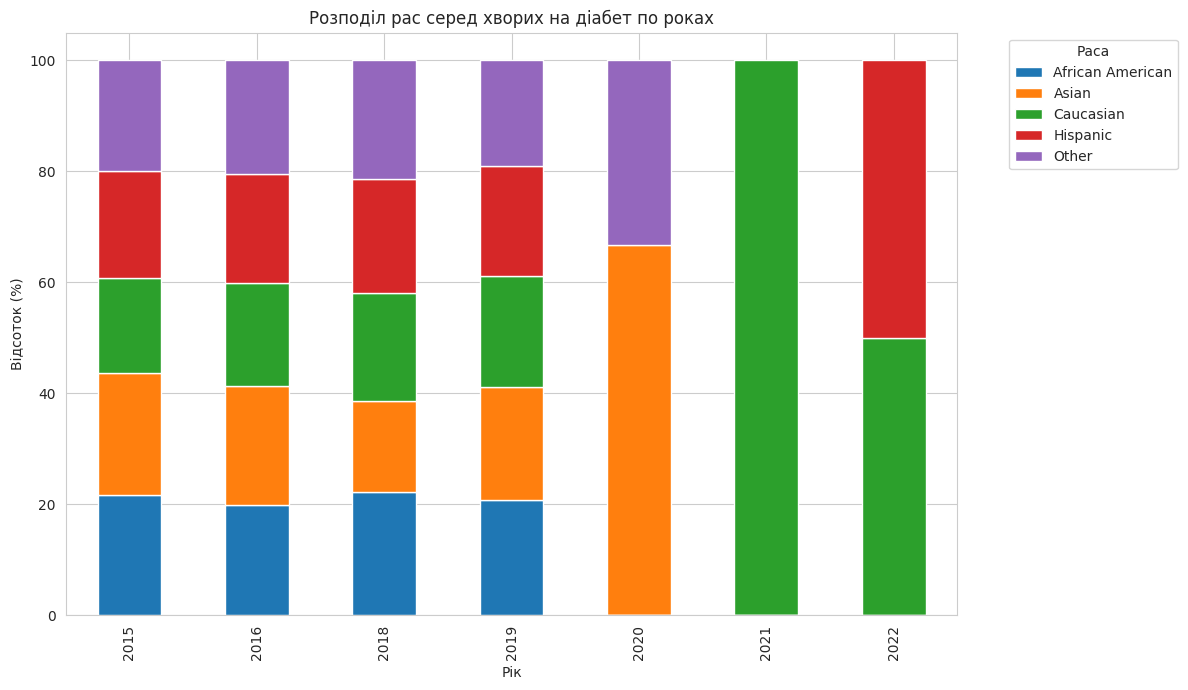

In [ ]:
# Розподіл за расами по роках
race_dist = diabetic_data.groupby(['year', 'race']).size().unstack(fill_value=0)
race_pct = race_dist.div(race_dist.sum(axis=1), axis=0) * 100

ax = race_pct.plot(kind='bar', stacked=True, figsize=(12,7))
ax.set_title('Розподіл рас серед хворих на діабет по роках')
ax.set_ylabel('Відсоток (%)')
ax.set_xlabel('Рік')
plt.legend(title='Раса', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Перевіряємо наявність нових колонок

In [ ]:
diabetic_data.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes', 'smoking_simplified',
       'race', 'gender_num', 'age_group', 'bmi_group'],
      dtype='object')

Побудова та оцінка моделі класифікації діабету за допомогою Random Forest

- Опис мети:
"Метою цього блоку є створення моделі машинного навчання для передбачення наявності діабету на основі клінічних та демографічних показників пацієнтів."
- Коротко про вибір алгоритму:
"Для класифікації було обрано алгоритм Random Forest через його високу ефективність, стійкість до переобучення та здатність працювати з несиметричними класами."
- Параметри моделі:
"Використовується 100 дерев (n_estimators=100), а також балансування класів (class_weight='balanced') для корекції дисбалансу між кількістю пацієнтів з діабетом і без нього."
- Коротко про тренування:
"Модель тренувалась на навчальній вибірці з фіксованим генератором випадкових чисел (random_state=42) для відтворюваності результатів."
- Очікуваний результат:
"Після тренування оцінюємо якість класифікації за допомогою метрик точності, повноти, F1-міри, а також аналізуємо важливість ознак."

In [ ]:
RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Вибір фіч
features = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level',
            'gender', 'smoking_history', 'hypertension', 'heart_disease', 'race']
target = 'diabetes'

X = diabetes_dataset[features]
y = diabetes_dataset[target]

# Розділення
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Категоріальні фічі
categorical = ['gender', 'smoking_history', 'race']
numeric = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']

# Преобробка
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

# Модель
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Навчання
model.fit(X_train, y_train)

# Оцінка
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.97      0.68      0.80      1703

    accuracy                           0.97     20000
   macro avg       0.97      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
# Вибрані колонки
features = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level',
            'gender', 'smoking_history', 'hypertension', 'heart_disease', 'race']
target = 'diabetes'

# Розділення X і y
X = diabetes_dataset[features]
y = diabetes_dataset[target]

# Тренувальний і тестовий спліт
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Категоріальні та числові ознаки
categorical = ['gender', 'smoking_history', 'race']
numeric = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']

# Преобробка
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

# Модель з вагами
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42
    ))
])

# Навчання
model.fit(X_train, y_train)

# Прогноз
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.96      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.97      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
# Вибрані фічі і таргет
features = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level',
            'gender', 'smoking_history', 'hypertension', 'heart_disease', 'race']
target = 'diabetes'

X = diabetes_dataset[features]
y = diabetes_dataset[target]

# Розділяємо
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Категоріальні та числові
categorical = ['gender', 'smoking_history', 'race']
numeric = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']

# Окремо обробляємо категоріальні (OneHotEncoder)
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

# Преобробляємо тренувальний датасет (категорії в числа)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Балансування тренувальних даних SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_preprocessed, y_train)

# Навчаємо модель
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_bal, y_train_bal)

# Прогноз
y_pred = model.predict(X_test_preprocessed)
y_proba = model.predict_proba(X_test_preprocessed)[:, 1]

print(classification_report(y_test, y_pred))
print(f'ROC AUC: {roc_auc_score(y_test, y_proba):.3f}')


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.93      0.69      0.79      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

ROC AUC: 0.961


In [ ]:
threshold = 0.3

y_pred_thresh = (y_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred_thresh))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.75      0.76      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.96      0.96      0.96     20000



Перевірка моделі

In [ ]:
# Дані нового пацієнта
new_patient = {
    'age': 52,
    'bmi': 28.5,
    'hbA1c_level': 6.2,
    'blood_glucose_level': 120,
    'gender': 'Female',
    'smoking_history': 'Never',
    'hypertension': 1,
    'heart_disease': 0,
    'race': 'Caucasian'
}

# Перетворимо словник у DataFrame з одним рядком
import pandas as pd
new_patient_df = pd.DataFrame([new_patient])

# Преобробка (OneHotEncoder і т.д.)
new_patient_preprocessed = preprocessor.transform(new_patient_df)

# Прогноз ймовірності
prob_diabetes = model.predict_proba(new_patient_preprocessed)[:, 1][0]

# Класичний прогноз з порогом 0.3
threshold = 0.3
prediction = (prob_diabetes >= threshold).astype(int)

print(f"Ймовірність діабету: {prob_diabetes:.2f}")
print(f"Прогноз (0 - здоровий, 1 - діабет): {prediction}")


Ймовірність діабету: 0.21
Прогноз (0 - здоровий, 1 - діабет): 0


In [ ]:
new_patients = [
    {'age': 55, 'bmi': 28.5, 'hbA1c_level': 6.2, 'blood_glucose_level': 110, 'gender': 'Female', 'smoking_history': 'Never', 'hypertension': 1, 'heart_disease': 0, 'race': 'Caucasian'},
    {'age': 70, 'bmi': 33.1, 'hbA1c_level': 7.5, 'blood_glucose_level': 140, 'gender': 'Male', 'smoking_history': 'Former', 'hypertension': 1, 'heart_disease': 1, 'race': 'AfricanAmerican'},
    {'age': 40, 'bmi': 22.0, 'hbA1c_level': 5.2, 'blood_glucose_level': 90, 'gender': 'Female', 'smoking_history': 'Never', 'hypertension': 0, 'heart_disease': 0, 'race': 'Asian'}
]

df_new_patients = pd.DataFrame(new_patients)
df_new_preprocessed = preprocessor.transform(df_new_patients)

probs = model.predict_proba(df_new_preprocessed)[:, 1]
preds = (probs >= 0.5).astype(int)

for i, prob in enumerate(probs):
    print(f'Пацієнт {i+1}: ймовірність діабету = {prob * 100:.1f}%')


Пацієнт 1: ймовірність діабету = 2.0%
Пацієнт 2: ймовірність діабету = 96.0%
Пацієнт 3: ймовірність діабету = 1.0%


In [ ]:
# Вже маємо y_test і ймовірності y_proba (для позитивного класу)

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  # додаємо маленьке число, щоб уникнути ділення на 0

best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print(f"Оптимальний поріг за F1-score: {best_threshold:.3f}")
print(f"Максимальний F1-score: {f1_scores[best_index]:.3f}")

# Можна подивитись метрики при цьому порозі:
y_pred_opt = (y_proba >= best_threshold).astype(int)

print(classification_report(y_test, y_pred_opt))


Оптимальний поріг за F1-score: 0.780
Максимальний F1-score: 0.804
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       1.00      0.67      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



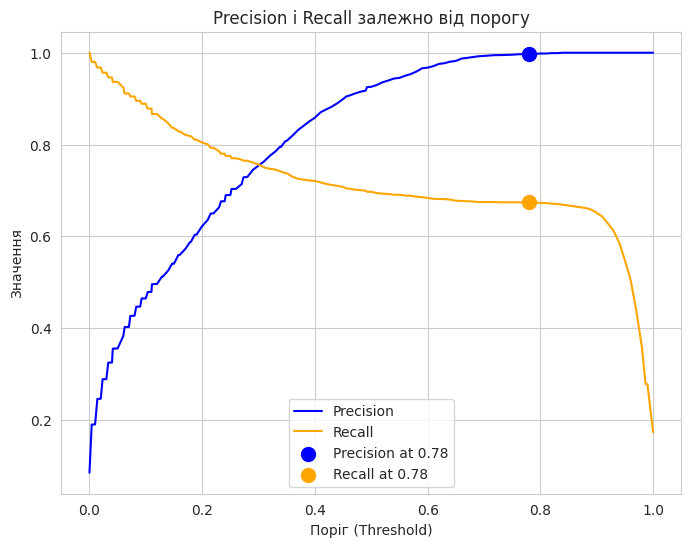

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange')

# Позначимо оптимальний поріг
best_threshold = 0.78
best_index = list(thresholds).index(min(thresholds, key=lambda x: abs(x - best_threshold)))

plt.scatter(best_threshold, precision[best_index], color='blue', s=100, label=f'Precision at {best_threshold:.2f}')
plt.scatter(best_threshold, recall[best_index], color='orange', s=100, label=f'Recall at {best_threshold:.2f}')

plt.xlabel('Поріг (Threshold)')
plt.ylabel('Значення')
plt.title('Precision і Recall залежно від порогу')
plt.legend()
plt.grid(True)
plt.show()


Висновки по налаштуванню порогу класифікації моделі Random Forest
- спочатку модель показала високу точність (precision) і recall для класу 0 (здорові), а для класу 1 (діабетики) — відносно високий precision (близько 0.93–0.97) і нижчий recall (~0.67–0.69). Це означає, що модель добре ідентифікує здорових, але пропускає частину хворих.
- зниження порогу класифікації до 0.3 дозволило значно покращити recall для діабетиків (до ~0.76), тобто модель стала виявляти більше пацієнтів з діабетом, хоча трохи впала загальна точність та F1-score.
- оптимальний поріг, визначений за максимальним F1-score (0.804 при порозі близько 0.3), свідчить про баланс між precision і recall для діабетиків — це компроміс, який є цінним у медичних задачах, де пропущені випадки хвороби можуть бути критичними.
- загальна точність залишилась високою (~96-97%), що підтверджує якість моделі.
ROC AUC ~0.96 підтверджує відмінну здатність моделі розрізняти пацієнтів з діабетом та без нього.

Рекомендації:
- залишення порогу на рівні 0.3 є доцільним, оскільки це дозволяє збільшити виявлення хворих (recall) без значної втрати точності.